<a href="https://colab.research.google.com/github/Ajinkya101010/Image-and-Video-Processing/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Applied Deep Learning
Assignment 1 Submission :-
Name : Ajinkya Waghulikar,
Neptun ID : FGRQTC


In [1]:
import os, random
import cv2, dlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import tensorflow as tf
import keras
from keras import backend as K
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.utils import np_utils
import random
from keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from sklearn.metrics import confusion_matrix, classification_report
import itertools

In [2]:
url = "http://nipg1.inf.elte.hu:8765/fer2013.csv"
data = pd.read_csv(url)

In [3]:
%matplotlib inline
emotions = pd.DataFrame({'emotions': data.emotion})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc8b2321d0>]],
      dtype=object)

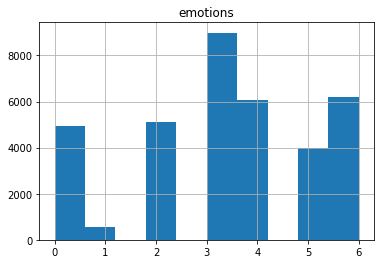

In [4]:
emotions.hist()

In [5]:
def image_converting(row):
    pixels = row['pixels']
    img = np.array(pixels.split())
    img = img.reshape(48,48)
    image = np.zeros((48,48,3)) 
    image[:,:,0] = img
    image[:,:,1] = img
    image[:,:,2] = img
    return image.astype(np.uint8)

In [6]:
count = 0
imag = []

for i in range(1, 6): 
    face = data.iloc[i]
    img = image_converting(face) 
    count = count + 1  
    imag.append(img)

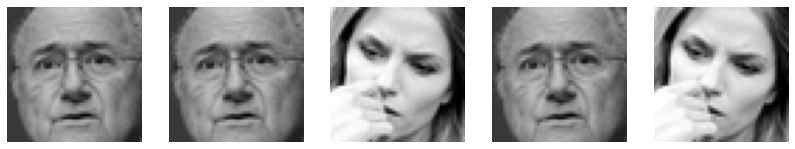

In [7]:
selected = np.random.choice(len(imag), 5)

plt.figure(figsize=(14, 6))
for i, ind in enumerate(selected):
  plt.subplot(2, 5, i+1)
  plt.imshow(imag[ind][..., ::-1])
  plt.axis('off')

In [8]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [9]:
data.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [10]:
data.Usage.value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [11]:
train_set = data[(data.Usage == 'Training')] 
X_train = np.array(list(map(str.split, train_set.pixels)), np.float32)
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
print("x_train:",X_train.shape)

x_train: (28709, 48, 48, 1)


In [12]:
val_set = data[(data.Usage == 'PublicTest')]
X_val = np.array(list(map(str.split, val_set.pixels)), np.float32) 
X_val = X_val.reshape(X_val.shape[0], 48, 48, 1)
print("x_val:",X_val.shape)

x_val: (3589, 48, 48, 1)


In [13]:
test_set = data[(data.Usage == 'PrivateTest')] 
X_test = np.array(list(map(str.split, test_set.pixels)), np.float32)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
print("x_test:",X_test.shape)

x_test: (3589, 48, 48, 1)


In [14]:
num_classes = 7

y_train = train_set.emotion 
y_train = np_utils.to_categorical(y_train, num_classes)
print("y_train:",y_train.shape)
y_val = val_set.emotion 
y_val = np_utils.to_categorical(y_val, num_classes)
print("y_val:",y_val.shape)
y_test = test_set.emotion 
y_test = np_utils.to_categorical(y_test, num_classes)
print("y_test:",y_test.shape)

y_train: (28709, 7)
y_val: (3589, 7)
y_test: (3589, 7)


In [15]:
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=10,
                             width_shift_range=0.2,
                             height_shift_range=0.2, 
                             zoom_range=0.2,
                             horizontal_flip=True)

testgen = ImageDataGenerator(rescale=1./255)

datagen.fit(X_train)
batch_size = 64

In [16]:
train_flow = datagen.flow(X_train, y_train, batch_size=batch_size) 
val_flow = testgen.flow(X_val, y_val, batch_size=batch_size) 
test_flow = testgen.flow(X_test, y_test, batch_size=batch_size)

In [17]:
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D

input_shape = (48, 48, 1)

model = Sequential()

model.add(Conv2D(filters=64,input_shape=(input_shape),kernel_size=(3,3),padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.6))

#model.add(Flatten())
model.add(GlobalAveragePooling2D())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=num_classes, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       7

In [18]:
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [19]:
num_epochs = 50
history = model.fit(train_flow, 
                    steps_per_epoch=len(X_train) // batch_size, 
                    epochs=num_epochs,  
                    verbose=1,  
                    validation_data=val_flow,  
                    validation_steps=len(X_val) // batch_size)

Epoch 1/50
448/448 [==============================] - 103s 154ms/step - loss: 2.0215 - accuracy: 0.2105 - val_loss: 1.8243 - val_accuracy: 0.2492
Epoch 2/50
448/448 [==============================] - 67s 149ms/step - loss: 1.8209 - accuracy: 0.2391 - val_loss: 1.8091 - val_accuracy: 0.2508
Epoch 3/50
448/448 [==============================] - 67s 149ms/step - loss: 1.7893 - accuracy: 0.2551 - val_loss: 1.9294 - val_accuracy: 0.2104
Epoch 4/50
448/448 [==============================] - 67s 149ms/step - loss: 1.7260 - accuracy: 0.2979 - val_loss: 1.7972 - val_accuracy: 0.2525
Epoch 5/50
448/448 [==============================] - 67s 149ms/step - loss: 1.6042 - accuracy: 0.3635 - val_loss: 1.4213 - val_accuracy: 0.4375
Epoch 6/50
448/448 [==============================] - 67s 149ms/step - loss: 1.4921 - accuracy: 0.4219 - val_loss: 1.3594 - val_accuracy: 0.4581
Epoch 7/50
448/448 [==============================] - 67s 150ms/step - loss: 1.4236 - accuracy: 0.4583 - val_loss: 1.4884 - val_a

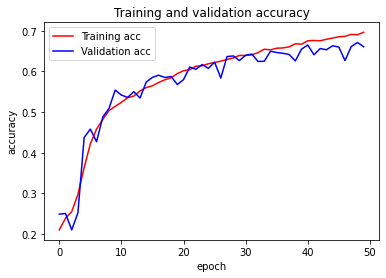

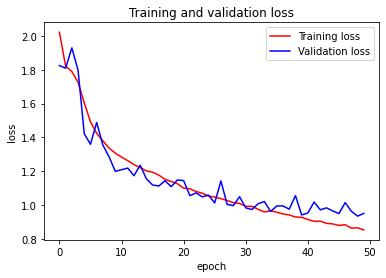

In [20]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
num_epochs = range(len(accuracy))
plt.plot(num_epochs, accuracy, 'r', label='Training acc')
plt.plot(num_epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(num_epochs, loss, 'r', label='Training loss')
plt.plot(num_epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

In [21]:
training_loss = model.evaluate(train_flow, steps=len(X_train) / batch_size) 
print("Train Loss " + str(training_loss[0]))
print("Train Acc: " + str(training_loss[1]))
validation_loss = model.evaluate(val_flow, steps=len(X_val) / batch_size) 
print("Val Loss " + str(validation_loss[0]))
print("Val Acc: " + str(validation_loss[1]))
test_loss = model.evaluate(test_flow, steps=len(X_test) / batch_size) 
print("Test Loss " + str(test_loss[0]))
print("Test Acc: " + str(test_loss[1]))

448/448 [==============================] - 23s 50ms/step - loss: 0.7804 - accuracy: 0.7152
Train Loss 0.7803515195846558
Train Acc: 0.7152460813522339
56/56 [==============================] - 3s 52ms/step - loss: 0.9519 - accuracy: 0.6606
Val Loss 0.9518904685974121
Val Acc: 0.6606296896934509
56/56 [==============================] - 3s 45ms/step - loss: 0.9117 - accuracy: 0.6637
Test Loss 0.9117496013641357
Test Acc: 0.6636946201324463


In [22]:
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Unnormalized confusion matrix',
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_test, y_pred)
    
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        
    np.set_printoptions(precision=2)

    plt.rcParams["figure.figsize"] = (8,8)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True expression')
    plt.xlabel('Predicted expression')
    plt.show()

In [23]:
y_pred_ = model.predict(X_test/255., verbose=1)
y_pred = np.argmax(y_pred_, axis=1)
t_te = np.argmax(y_test, axis=1)

113/113 [==============================] - 4s 25ms/step


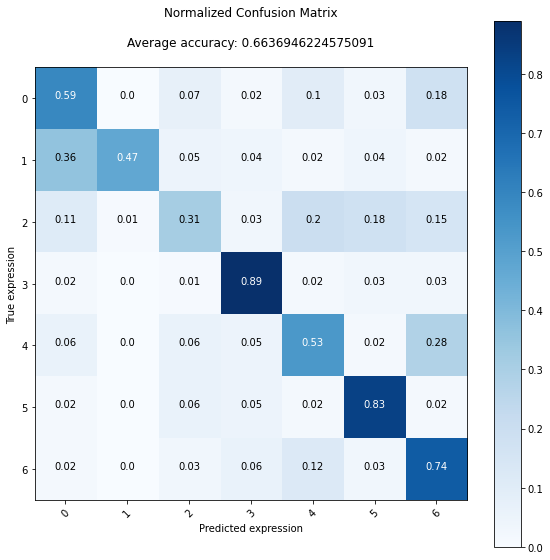

In [24]:
labels = np.array(("0", "1", "2", "3", "4", "5", "6"))

fig = plot_confusion_matrix(y_test=t_te, y_pred=y_pred,
                      classes=labels,
                      normalize=True,
                      cmap=plt.cm.Blues,
                      title='Normalized Confusion Matrix'+'\n\n'+'Average accuracy: ' + str(np.sum(y_pred == t_te)/len(t_te)) + '\n')

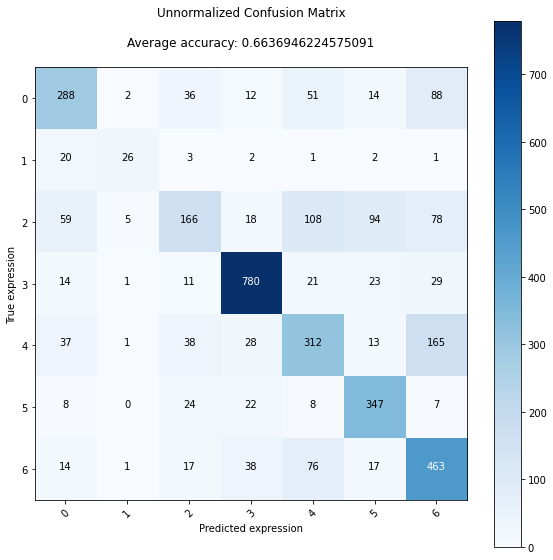

In [25]:
fig = plot_confusion_matrix(y_test=t_te, y_pred=y_pred,
                      classes=labels,
                      normalize=False,
                      cmap=plt.cm.Blues,
                      title='Unnormalized Confusion Matrix'+'\n\n'+'Average accuracy: ' + str(np.sum(y_pred == t_te)/len(t_te)) + '\n')

In [27]:
print(classification_report(t_te, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62       491
           1       0.72      0.47      0.57        55
           2       0.56      0.31      0.40       528
           3       0.87      0.89      0.88       879
           4       0.54      0.53      0.53       594
           5       0.68      0.83      0.75       416
           6       0.56      0.74      0.64       626

    accuracy                           0.66      3589
   macro avg       0.65      0.62      0.63      3589
weighted avg       0.66      0.66      0.65      3589



In [28]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [29]:
X_use = np.array(list(map(str.split, train_set.pixels)), np.float32)
y_use = train_set.emotion
X_over, y_over = undersample.fit_resample(X_use, y_use)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [30]:
X_over = X_over.reshape(X_over.shape[0], 48, 48, 1)
print("x_over",X_over.shape)
y_over = np_utils.to_categorical(y_over, num_classes)
print("y_over:",y_over.shape)

x_over (21930, 48, 48, 1)
y_over: (21930, 7)


In [31]:
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=10,
                             width_shift_range=0.2,
                             height_shift_range=0.2, 
                             zoom_range=0.2,
                             horizontal_flip=True)

testgen = ImageDataGenerator(rescale=1./255)

datagen.fit(X_over)
batch_size = 64

In [32]:
train_flow = datagen.flow(X_over, y_over, batch_size=batch_size) 
val_flow = testgen.flow(X_val, y_val, batch_size=batch_size) 
test_flow = testgen.flow(X_test, y_test, batch_size=batch_size)

In [33]:
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D

input_shape = (48, 48, 1)

model = Sequential()

model.add(Conv2D(filters=64,input_shape=(input_shape),kernel_size=(3,3),padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.6))

#model.add(Flatten())
model.add(GlobalAveragePooling2D())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=num_classes, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_13 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_14 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 128)      

In [34]:
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [35]:
num_epochs = 50
history = model.fit(train_flow, 
                    steps_per_epoch=len(X_over) // batch_size, 
                    epochs=num_epochs,  
                    verbose=1,  
                    validation_data=val_flow,  
                    validation_steps=len(X_val) // batch_size)

Epoch 1/50
342/342 [==============================] - 55s 156ms/step - loss: 1.9818 - accuracy: 0.2229 - val_loss: 2.0143 - val_accuracy: 0.1376
Epoch 2/50
342/342 [==============================] - 51s 150ms/step - loss: 1.7310 - accuracy: 0.2497 - val_loss: 2.1144 - val_accuracy: 0.2054
Epoch 3/50
342/342 [==============================] - 52s 150ms/step - loss: 1.6698 - accuracy: 0.2816 - val_loss: 2.2061 - val_accuracy: 0.2313
Epoch 4/50
342/342 [==============================] - 52s 151ms/step - loss: 1.6313 - accuracy: 0.2982 - val_loss: 1.9245 - val_accuracy: 0.2450
Epoch 5/50
342/342 [==============================] - 51s 150ms/step - loss: 1.5837 - accuracy: 0.3379 - val_loss: 1.9615 - val_accuracy: 0.2818
Epoch 6/50
342/342 [==============================] - 52s 151ms/step - loss: 1.5455 - accuracy: 0.3654 - val_loss: 1.9691 - val_accuracy: 0.3119
Epoch 7/50
342/342 [==============================] - 52s 151ms/step - loss: 1.5114 - accuracy: 0.3943 - val_loss: 1.9682 - val_ac

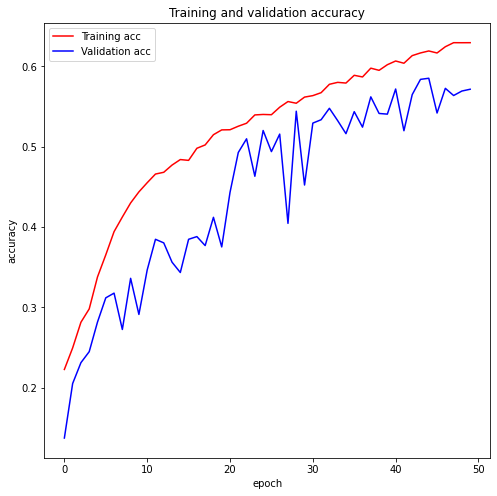

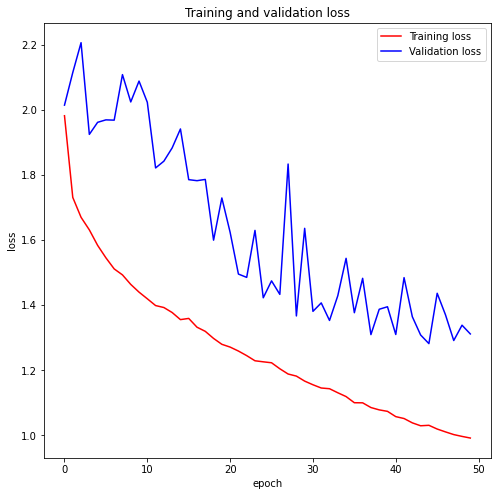

In [36]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
num_epochs = range(len(accuracy))
plt.plot(num_epochs, accuracy, 'r', label='Training acc')
plt.plot(num_epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(num_epochs, loss, 'r', label='Training loss')
plt.plot(num_epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

In [37]:
training_loss = model.evaluate(train_flow, steps=len(X_over) / 342) 
print("Train Loss " + str(training_loss[0]))
print("Train Acc: " + str(training_loss[1]))
validation_loss = model.evaluate(val_flow, steps=len(X_val) / batch_size) 
print("Val Loss " + str(validation_loss[0]))
print("Val Acc: " + str(validation_loss[1]))
test_loss = model.evaluate(test_flow, steps=len(X_test) / batch_size) 
print("Test Loss " + str(test_loss[0]))
print("Test Acc: " + str(test_loss[1]))

64/64 [==============================] - 3s 52ms/step - loss: 0.9407 - accuracy: 0.6392
Train Loss 0.9406542778015137
Train Acc: 0.6391826868057251
56/56 [==============================] - 3s 46ms/step - loss: 1.3127 - accuracy: 0.5712
Val Loss 1.3126553297042847
Val Acc: 0.5711897611618042
56/56 [==============================] - 3s 45ms/step - loss: 1.2625 - accuracy: 0.5809
Test Loss 1.2624802589416504
Test Acc: 0.5809417963027954


In [38]:
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Unnormalized confusion matrix',
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_test, y_pred)
    
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        
    np.set_printoptions(precision=2)

    plt.rcParams["figure.figsize"] = (8,8)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True expression')
    plt.xlabel('Predicted expression')
    plt.show()

In [39]:
y_pred_ = model.predict(X_test/255., verbose=1)
y_pred = np.argmax(y_pred_, axis=1)
t_te = np.argmax(y_test, axis=1)

113/113 [==============================] - 3s 26ms/step


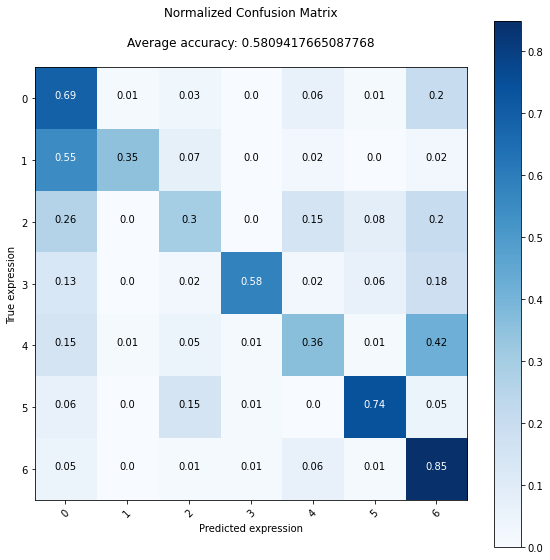

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools
labels = np.array(("0", "1", "2", "3", "4", "5", "6"))

fig = plot_confusion_matrix(y_test=t_te, y_pred=y_pred,
                      classes=labels,
                      normalize=True,
                      cmap=plt.cm.Blues,
                      title='Normalized Confusion Matrix'+'\n\n'+'Average accuracy: ' + str(np.sum(y_pred == t_te)/len(t_te)) + '\n')

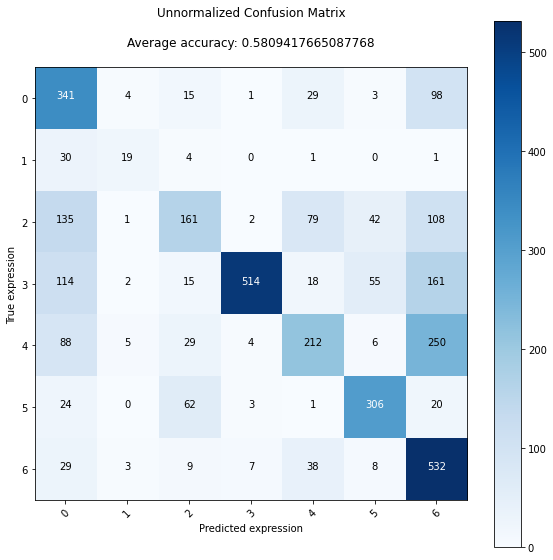

In [41]:
fig = plot_confusion_matrix(y_test=t_te, y_pred=y_pred,
                      classes=labels,
                      normalize=False,
                      cmap=plt.cm.Blues,
                      title='Unnormalized Confusion Matrix'+'\n\n'+'Average accuracy: ' + str(np.sum(y_pred == t_te)/len(t_te)) + '\n')

In [42]:
print(classification_report(t_te, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.69      0.54       491
           1       0.56      0.35      0.43        55
           2       0.55      0.30      0.39       528
           3       0.97      0.58      0.73       879
           4       0.56      0.36      0.44       594
           5       0.73      0.74      0.73       416
           6       0.45      0.85      0.59       626

    accuracy                           0.58      3589
   macro avg       0.61      0.55      0.55      3589
weighted avg       0.64      0.58      0.58      3589

